Contents:

1.Hyperparamter Tuning following the same steps but tuned multipled Hyperparameters at once. 
I have mentioned some different functions and methods too for display which I have not used for tuning.

2.Disadvantages of KNN

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score

from matplotlib import pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\neell\\Documents\\DataScience\\Module3'

In [5]:
my_path = 'C:/Users/neell/Documents/DataScience/Module3'

In [6]:
my_df = pd.read_csv(f'{my_path}/Titanic_full.csv')
print(my_df.shape)
my_df.head(3)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Splitting data

In [7]:
def split (my_df,num_of_rows):
    return my_df[:num_of_rows].copy(),my_df[num_of_rows:]


mydf_train_valid,mydf_test = split(my_df,1100)

print(mydf_train_valid.shape,mydf_test.shape)
    

(1100, 12) (209, 12)


In [8]:
## n - number of lines \\ o- output plus code \\\ t - 
%history -o

import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score

from matplotlib import pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline
%pwd
'C:\\Users\\neell\\Documents\\DataScience\\Module3'
my_path = 'C:\\Users\\braya\\Desktop\\Data'
my_df = pd.read_csv(f'{my_path}/Titanic_full.csv')
print(my_df.shape)
my_df.head(3)
my_path = 'C:/Users/neell/Documents/DataScience/Module3'
my_df = pd.read_csv(f'{my_path}/Titanic_full.csv')
print(my_df.shape)
my_df.head(3)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradl

In [9]:
#Pandarallel

#### Handling Null Values

,Feature,Percent missing
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,19.909091
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.090909


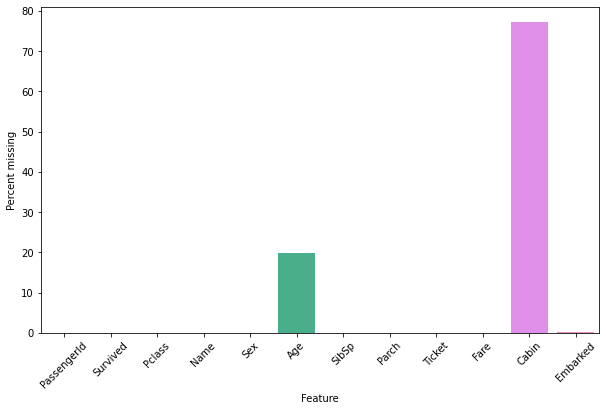

In [10]:
null_vals = mydf_train_valid.isnull().sum()/len(mydf_train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)
null_vals

In [11]:
##New Method

In [12]:
def missing(x):
    return sum(x.isnull())

In [13]:
#apply per column
mydf_train_valid.apply(missing,axis =0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            219
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          849
Embarked         2
dtype: int64

In [14]:
#apply per row
mydf_train_valid.apply(missing,axis =1)

0       1
1       0
2       1
3       0
4       1
       ..
1095    1
1096    2
1097    1
1098    1
1099    0
Length: 1100, dtype: int64

In [15]:
mydf_train_valid_2 = mydf_train_valid.drop("Cabin",axis = 1)
print(mydf_train_valid_2.shape)
mydf_train_valid_2.head(2)

(1100, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [16]:
mydf_train_valid_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1100 non-null   int64  
 1   Survived     1100 non-null   int64  
 2   Pclass       1100 non-null   int64  
 3   Name         1100 non-null   object 
 4   Sex          1100 non-null   object 
 5   Age          881 non-null    float64
 6   SibSp        1100 non-null   int64  
 7   Parch        1100 non-null   int64  
 8   Ticket       1100 non-null   object 
 9   Fare         1099 non-null   float64
 10  Embarked     1098 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 94.7+ KB


##### Another Possible method to convert Object type to Category 

In [17]:
mydf_train_valid_test = mydf_train_valid_2.astype({"Name":'category', "Sex":'category','Ticket':'category'
                                                   ,'Embarked':'category'}) 

In [18]:
mydf_train_valid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1100 non-null   int64   
 1   Survived     1100 non-null   int64   
 2   Pclass       1100 non-null   int64   
 3   Name         1100 non-null   category
 4   Sex          1100 non-null   category
 5   Age          881 non-null    float64 
 6   SibSp        1100 non-null   int64   
 7   Parch        1100 non-null   int64   
 8   Ticket       1100 non-null   category
 9   Fare         1099 non-null   float64 
 10  Embarked     1098 non-null   category
dtypes: category(4), float64(2), int64(5)
memory usage: 161.8 KB


In [19]:
##USING FOR LOOP

mydf_train_valid_test2 = mydf_train_valid
for col in ['Name', 'Sex', 'Ticket', 'Embarked']:
    mydf_train_valid_test2[col] = mydf_train_valid_2[col].astype('category')
mydf_train_valid_test2.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1100 non-null   int64   
 1   Survived     1100 non-null   int64   
 2   Pclass       1100 non-null   int64   
 3   Name         1100 non-null   category
 4   Sex          1100 non-null   category
 5   Age          881 non-null    float64 
 6   SibSp        1100 non-null   int64   
 7   Parch        1100 non-null   int64   
 8   Ticket       1100 non-null   category
 9   Fare         1099 non-null   float64 
 10  Cabin        251 non-null    object  
 11  Embarked     1098 non-null   category
dtypes: category(4), float64(2), int64(5), object(1)
memory usage: 170.4+ KB


### Actual Method used by Professor

In [20]:
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [21]:
mydf_train_valid_3 = str_to_cat(mydf_train_valid_2)
print()

In [22]:
mydf_train_valid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1100 non-null   int64   
 1   Survived     1100 non-null   int64   
 2   Pclass       1100 non-null   int64   
 3   Name         1100 non-null   category
 4   Sex          1100 non-null   category
 5   Age          881 non-null    float64 
 6   SibSp        1100 non-null   int64   
 7   Parch        1100 non-null   int64   
 8   Ticket       1100 non-null   category
 9   Fare         1099 non-null   float64 
 10  Embarked     1098 non-null   category
dtypes: category(4), float64(2), int64(5)
memory usage: 161.8 KB


In [23]:
print(mydf_train_valid_3.Embarked.cat.categories)
print(mydf_train_valid_3.Sex.cat.categories)

Index(['C', 'Q', 'S'], dtype='object')
Index(['female', 'male'], dtype='object')


In [24]:
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [25]:
mydf_train_valid_4,my_table = mydf_preprocessor(mydf_train_valid_3,null_table = None)

In [26]:
mydf_train_valid_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_na,Fare_na
0,1,0,3,135,2,22.0,1,0,629,7.2500,3,False,False
1,2,1,1,245,1,38.0,1,0,713,71.2833,1,False,False
2,3,1,3,442,1,26.0,0,0,799,7.9250,3,False,False
3,4,1,1,354,1,35.0,1,0,56,53.1000,3,False,False
4,5,0,3,19,2,35.0,0,0,565,8.0500,3,False,False


In [27]:
my_table

{'Age': 28.0, 'Fare': 14.4583}

In [28]:
null_vals12 = mydf_train_valid_4.isnull().sum()/len(mydf_train_valid_4)*100
null_vals12 = pd.DataFrame(null_vals12)

In [29]:
null_vals12

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [30]:
Y = mydf_train_valid_4["Survived"]
X = mydf_train_valid_4.drop(["Survived"],axis = 1)

print(X.shape,Y.shape)

(1100, 12) (1100,)


In [31]:
X_cat = X[['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Embarked', 'Age_na','Fare_na']]
X_con = X.drop(X_cat,axis = 1)
print(X_cat.shape,X_con.shape)

(1100, 10) (1100, 2)


In [32]:
scaler = preprocessing.StandardScaler().fit(X_con)
X_con_sc = pd.DataFrame(scaler.transform(X_con))
X_con_sc.columns = ["Age","Fare"]
print(X_con_sc.shape)
X_con_sc.head(2)

(1100, 2)


,Age,Fare
0,-0.574896,-0.502155
1,0.659705,0.747957


In [33]:
df_list = [X_cat,X_con_sc]
X_full = pd.concat(df_list,axis = 1)
print(X_full.shape)
X_full

(1100, 12)


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Age,Fare
0,1,3,135,2,1,0,629,3,False,False,-0.574896,-0.502155
1,2,1,245,1,1,0,713,1,False,False,0.659705,0.747957
2,3,3,442,1,0,0,799,3,False,False,-0.266246,-0.488977
3,4,1,354,1,1,0,56,3,False,False,0.428217,0.392967
4,5,3,19,2,0,0,565,3,False,False,0.428217,-0.486537
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,2,37,2,0,0,669,3,False,False,-0.343408,-0.438706
1096,1097,1,758,2,0,0,680,1,True,False,-0.111921,-0.141145
1097,1098,3,653,1,0,0,615,2,False,False,0.428217,-0.492394
1098,1099,2,216,2,0,0,266,3,False,False,-0.420571,-0.438706


In [34]:
X_train,X_valid = split(X_full,900)
Y_train,Y_valid = split(Y,900)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(900, 12) (200, 12) (900,) (200,)


In [35]:
my_knn_model = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform')
my_knn_model.fit(X_train,Y_train)

#Predict on the validation set
Y_pred = my_knn_model.predict(X_valid)

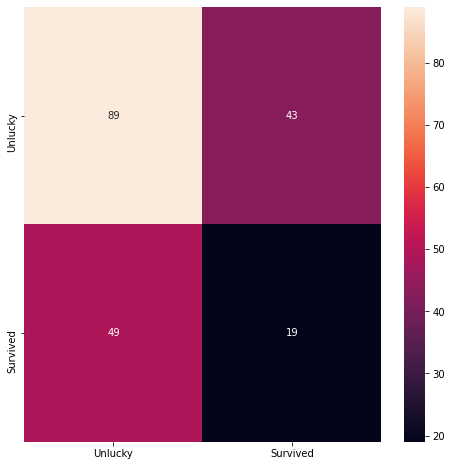

In [36]:
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_valid,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["Unlucky","Survived"],
            yticklabels = ["Unlucky","Survived"],annot = True)

In [37]:
print(accuracy_score(Y_valid,Y_pred),
      matthews_corrcoef(Y_valid,Y_pred),f1_score(Y_valid,Y_pred))

0.54 -0.0474697036788388 0.29230769230769227


### Hyperparameter tuning

#### Using Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [39]:
param_grid = {'n_neighbors':range(1,20),"metric": ["euclidean", "cityblock",'minkowski'],
              'algorithm' :['ball_tree','kd_tree','brute'], 'weights': ['uniform', 'distance'],'p':[1,2] 
             }

In [40]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,Y_train)
Y_pred = knn_cv.predict(X_valid)
accuracy = accuracy_score(Y_valid,Y_pred)
#it takes approx 1min

In [41]:
accuracy

0.555

In [42]:
knn_cv.best_score_

0.6122222222222222

In [43]:
knn_cv.best_params_

{'algorithm': 'ball_tree',
 'metric': 'cityblock',
 'n_neighbors': 12,
 'p': 1,
 'weights': 'uniform'}

#### Using Random Search

In [44]:
param_grid1 = {'n_neighbors':range(1,20)  }

In [45]:
knn1 = KNeighborsClassifier()
grid = RandomizedSearchCV(knn1,param_grid1)
grid.fit(X_train,Y_train)
Y_pred1 = grid.predict(X_valid)
accuracy1 = accuracy_score(Y_valid,Y_pred1)

In [46]:
accuracy1

0.58

In [47]:
grid.best_score_

0.6066666666666667

In [48]:
grid.best_params_

{'n_neighbors': 18}

##### IMPLEMETING KNN WITH GIRD SEARCH PARAMETERS

In [49]:
knn_model_final = KNeighborsClassifier(n_neighbors = 16,weights = 'uniform',algorithm= 'ball_tree',
                                       metric= 'euclidean',p = 1)
knn_model_final.fit(X_full,Y)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=16,
                     p=1)

In [52]:
my_path = 'C:/Users/neell/Documents/DataScience/Module3'

In [53]:
!mkdir knn_model
knn_model_name = f'{my_path}\\knn_model\knn_model_final.sav'
joblib.dump(knn_model_final,knn_model_name)



A subdirectory or file knn_model already exists.


['C:/Users/neell/Documents/DataScience/Module3\\knn_model\\knn_model_final.sav']

### TESTING

In [54]:
print(mydf_test.shape)
mydf_test.head(3)

(209, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1100,1101,1,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
1101,1102,0,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,NaN,S
1102,1103,1,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S


In [55]:
mydf_test1 = mydf_test.drop("Cabin",axis = 1)
print(mydf_test1.shape)
mydf_test1.head(3)

(209, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1100,1101,1,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,S
1101,1102,0,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,S
1102,1103,1,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,S


In [56]:

mydf_test2 = str_to_cat(mydf_test1)
print(mydf_test2.info())
print(mydf_test2.Sex.cat.categories)
mydf_test2.Embarked.cat.categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 1100 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  209 non-null    int64   
 1   Survived     209 non-null    int64   
 2   Pclass       209 non-null    int64   
 3   Name         209 non-null    category
 4   Sex          209 non-null    category
 5   Age          165 non-null    float64 
 6   SibSp        209 non-null    int64   
 7   Parch        209 non-null    int64   
 8   Ticket       209 non-null    category
 9   Fare         209 non-null    float64 
 10  Embarked     209 non-null    category
dtypes: category(4), float64(2), int64(5)
memory usage: 31.1 KB
None
Index(['female', 'male'], dtype='object')


Index(['C', 'Q', 'S'], dtype='object')

In [57]:
mydf_test3,my_table1 = mydf_preprocessor(mydf_test2,
                                         null_table = my_table)
print(mydf_test3.shape)
print(my_table1)
mydf_test3.head(3)

(209, 13)
{'Age': 28.0, 'Fare': 14.4583}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_na,Fare_na
1100,1101,1,3,47,2,25.0,0,0,106,7.8958,3,False,False
1101,1102,0,3,6,2,32.0,0,0,146,22.5250,3,False,False
1102,1103,1,3,62,2,28.0,0,0,187,7.0500,3,True,False


In [58]:
Y_t = mydf_test3["Survived"]
X_t = mydf_test3.drop(["Survived"],axis = 1)

print(X_t.shape,Y_t.shape)

(209, 12) (209,)


In [59]:
X_cat_t = X_t[['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Embarked', 'Age_na','Fare_na']]
X_con_t = X_t.drop(X_cat_t,axis = 1)
print(X_cat_t.shape,X_con_t.shape)

(209, 10) (209, 2)


In [60]:
X_con_sct = pd.DataFrame(scaler.transform(X_con_t))
X_con_sct.columns = ["Age","Fare"]
print(X_con_sct.shape)
X_con_sct.head(2)

(209, 2)


,Age,Fare
0,-0.343408,-0.489547
1,0.196729,-0.203944


In [61]:
print(X_cat_t.shape,X_con_sct.shape)

(209, 10) (209, 2)


In [62]:
X_cat_t.reset_index(inplace = True,drop = False)

In [63]:
X_cat_t.head()

,index,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na
0,1100,1101,3,47,2,0,0,106,3,False,False
1,1101,1102,3,6,2,0,0,146,3,False,False
2,1102,1103,3,62,2,0,0,187,3,True,False
3,1103,1104,2,45,2,0,0,179,3,False,False
4,1104,1105,2,91,1,1,0,38,3,False,False


In [64]:
X_cat_t.drop("index",inplace = True,axis = 1)
X_cat_t.head(2)

C:\Users\neell\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na
0,1101,3,47,2,0,0,106,3,False,False
1,1102,3,6,2,0,0,146,3,False,False


In [65]:
df_list_I = [X_cat_t,X_con_sct]
X_test_I = pd.concat(df_list_I,axis = 1)
print(X_test_I.shape)
X_test_I.head(2)

(209, 12)


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Age,Fare
0,1101,3,47,2,0,0,106,3,False,False,-0.343408,-0.489547
1,1102,3,6,2,0,0,146,3,False,False,0.196729,-0.203944


In [66]:
kNN_loaded = joblib.load(f'{my_path}/knn_model/knn_model_final.sav')

In [67]:
Y_test_pred = kNN_loaded.predict(X_test_I)

In [68]:
print(accuracy_score(Y_t,Y_test_pred),
      matthews_corrcoef(Y_t,Y_test_pred),f1_score(Y_t,Y_test_pred))

0.5645933014354066 0.0 0.0


C:\Users\neell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [69]:
X_full["Survived"] = Y
X_test_I["Survived"] = Y_t

print(X_full.shape)
print(X_test_I.shape)

(1100, 13)
(209, 13)


# DISADVANTAGES OF THE KNN ALGORITHM ARE:

1. The KNN Algorithm does not work well with large datasets

2. It does not work well with high number of dimensions either

3. The Algorithm needs feature scaling to work properly

4. It is too sensitive to noisy data, missing values and outliers